<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/main/CV_Module_5_3__Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Networks


## Code: setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from torch import nn
from torch.nn import functional as F
!pip install d2l==0.16.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.2/77.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.0 MB/s eta 0:00:00


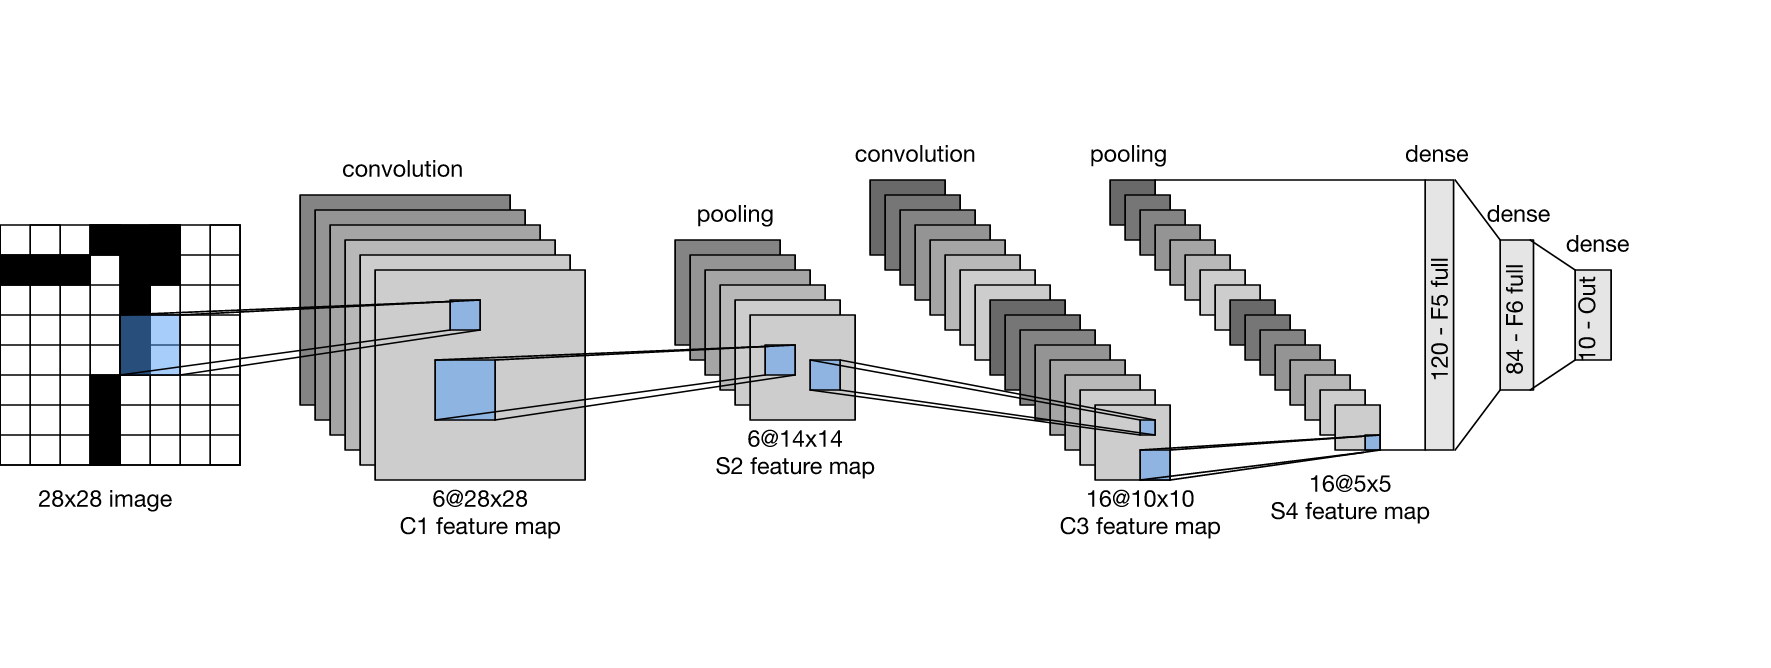

## Code: LeNet

In [2]:
import torch
from torch import nn

def CreateLeNet(Pooling = "average pooling", # maximum pooling
                Activation = "sigmoid",      # softmax, ReLU, LeakyReLU
                kernel_size= 5
):

    modules = []

    #######################################
    # First convolution layer
    #######################################
    modules.append(nn.Conv2d(in_channels=1, out_channels=6, kernel_size=kernel_size, padding=2))

    #activation layer
    if Activation == "softmax":
        modules.append(nn.Softmax())
    elif Activation == "ReLU":
        modules.append(nn.ReLU())
    elif Activation == "LeakyReLU":
        modules.append(nn.LeakyReLU())
    else:
        modules.append(nn.Sigmoid())

    if Pooling == "average pooling":
        modules.append(nn.AvgPool2d(kernel_size=2, stride=2))
    else:
        modules.append(nn.MaxPool2d(kernel_size=2, stride=2))

    #######################################
    # Second convolution layer
    #######################################
    modules.append(nn.Conv2d(6, 16, kernel_size=kernel_size))

    #activation layer
    if Activation == "softmax":
        modules.append(nn.Softmax())
    elif Activation == "ReLU":
        modules.append(nn.ReLU())
    elif Activation == "LeakyReLU":
        modules.append(nn.LeakyReLU())
    else:
        modules.append(nn.Sigmoid())

    if Pooling == "average pooling":
        modules.append(nn.AvgPool2d(kernel_size=2, stride=2))
    else:
        modules.append(nn.MaxPool2d(kernel_size=2, stride=2))

    #######################################
    # Third fully connected (FC) layer
    #######################################
    modules.append(nn.Flatten())
    modules.append(nn.Linear(16 * 5 * 5, 120))

    #activation layer
    if Activation == "softmax":
        modules.append(nn.Softmax())
    elif Activation == "ReLU":
        modules.append(nn.ReLU())
    elif Activation == "LeakyReLU":
        modules.append(nn.LeakyReLU())
    else:
        modules.append(nn.Sigmoid())

    #######################################
    # Fourth fully connected (FC) layer
    #######################################
    modules.append(nn.Linear(120, 84))

    #activation layer
    if Activation == "softmax":
        modules.append(nn.Softmax())
    elif Activation == "ReLU":
        modules.append(nn.ReLU())
    elif Activation == "LeakyReLU":
        modules.append(nn.LeakyReLU())
    else:
        modules.append(nn.Sigmoid())

    #######################################
    # Fifth fully connected (FC) layer
    #######################################
    modules.append(nn.Linear(84, 10))


    net = nn.Sequential(*modules)

    #By passing a single-channel (black and white)  28×28  image through
    #the network and printing the output shape at each layer, we can inspect
    #the model to make sure that its operations line up with what we expect.
    X = torch.rand(size=(1, 1, 28, 28), dtype=torch.float32)
    total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)
    print('Total parameters:', total_params)
    for layer in net:
        X = layer(X)
        print(layer.__class__.__name__, 'output shape: \t', X.shape)

    return net

net = CreateLeNet(Pooling = "average pooling", # maximum pooling
                  Activation = "sigmoid",      # softmax, ReLU, LeakyReLU
                  kernel_size= 5)


Total parameters: 61706
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


##Code (support): `Animator` class

In [3]:
from IPython import display
from d2l import torch as d2l

class Animator:
    """For plotting data in animation."""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(5, 5),title=None):
        # Incrementally plot multiple lines
        if legend is None:
            legend = []

        self.fig, self.axes = plt.subplots(nrows, ncols, figsize=figsize)
        self.fig.suptitle(title)
        if nrows * ncols == 1:
            self.axes = [self.axes,]
        # Use a lambda function to capture arguments
        self.config_axes = lambda: d2l.set_axes(self.axes[
            0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # Add multiple data points into the figure
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n  #repeat x axis values n times, one for each plot
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

## Code (support): `Accumulator`



In [4]:
class Accumulator:
    """For accumulating sums over `n` variables."""
    def __init__(self, n):
        self.data = [0.0] * n # creates [0.0, 0.0, ....n-times]

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]
        # Example: let self.data = [10, 15] and args be [3, 4]
        # zip(self.data, args) will produce the paired iterable [(10, 3), (15, 4)]
        # the for loop with go over these paired entries adding them up to result in [13, 19]

    def reset(self):
        self.data = [0.0] * len(self.data) # creates [0.0, 0.0, ....n-times]

    def __getitem__(self, idx):
        return self.data[idx]

## Code (support): `evaluate_accuracy`

In [5]:
def accuracy (y_hat, y):
    """Compute the number of correct predictions."""
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1: #The output is a vector -- not just a scalar
        y_hat = y_hat.argmax(axis=1)
    cmp = (y_hat.type(y.dtype) == y)
    return float(cmp.type(y.dtype).sum())

In [6]:
def evaluate_accuracy (net, data_iter):
    """Compute the accuracy for a model on a dataset."""
    net.eval()  # Set the model to evaluation mode
    metric = Accumulator(2)  # No. of correct predictions, no. of predictions

    with torch.no_grad():
        for X, y in data_iter: # iterate over the minibatches
            X, y = X.to(device), y.to(device)
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

## Code: Fashion MNIST data

Note: We are accessing the dataset directly from torch vision, unlike via d2l in a pervious lecture.

100%|██████████| 26421880/26421880 [00:01<00:00, 18412876.72it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 306100.96it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5488065.00it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 18662296.45it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

# of minibatches each of size 32 
	 in training data:1875, 
	 testing data: 313


torch.Size([32, 1, 28, 28])


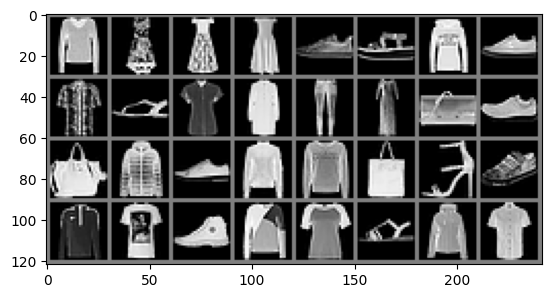

Pullover Dress Dress Dress Sneaker Sandal Pullover Sneaker Shirt Sandal Shirt Dress Trouser Dress   Bag Sneaker   Bag  Coat Sneaker  Coat Pullover   Bag Sandal Sneaker Pullover T-shirt Ankle boot Pullover T-shirt Sandal  Coat Shirt
tensor([2, 3, 3, 3, 7, 5, 2, 7, 6, 5, 6, 3, 1, 3, 8, 7, 8, 4, 7, 4, 2, 8, 5, 7,
        2, 0, 9, 2, 0, 5, 4, 6])


In [7]:
import torchvision.transforms as transforms

FashionMNIST_classes = ('T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
                        'Shirt', 'Sneaker', 'Bag', 'Ankle boot')
transform_FashionMNIST = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])
batch_size = 32

def GetDataLoader(batch_size = 32):
    trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                            download=True, transform=transform_FashionMNIST)
    testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                          download=True, transform=transform_FashionMNIST)


    train_iter = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                              shuffle=True, num_workers=2)
    test_iter = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                            shuffle=False, num_workers=2)
    return train_iter, test_iter

train_iter, test_iter = GetDataLoader(batch_size = 32)

print('# of minibatches each of size %d \n\t in training data:%d, \n\t testing data: %d'%(batch_size, len(train_iter), len(test_iter)))

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0))) #reorder into (row, col, color)
    plt.show()


# get some random training images
images, labels = next(iter(train_iter))
print(images.shape)
# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % FashionMNIST_classes[labels[j]] for j in range(batch_size)))
print(labels)




## Code: `train_full`

In [8]:
#-------------------------------------------------------------------------------
import time
def train_one_epoch (net, train_iter, loss, updater):
    """The training loop defined in Chapter 3."""
    # Set the model to training mode
    net.train()
    # Sum of training loss, sum of training accuracy, no. of examples
    metric = Accumulator(3)
    for X, y in train_iter:
            X, y = X.to(device), y.to(device) # Move data to device - GPU or CPU as set
            # Compute gradients and update parameters
            y_hat = net(X)
            l = loss(y_hat, y)

            # Using PyTorch in-built optimizer & loss criterion
            updater.zero_grad()
            l.backward()
            updater.step()
            metric.add(float(l) * len(y), accuracy(y_hat, y), y.numel())
        # Return training loss and training accuracy
    return metric[0] / metric[2], metric[1] / metric[2]

#-------------------------------------------------------------------------------
def train_full (net, train_iter, test_iter, num_epochs, lr,
                optimizerOption="Adam",
                initialization ="xavier_normal", chartTitle=None):

    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.1, 1.0],
                       legend=['train loss', 'train acc', 'test acc'],title=chartTitle)
    #----------------------Initialize-----------------------------------------
    # There is a default initialization in pytorch uses a uniform distribution bounded by 1/sqrt(in_features),
    # However, this might not be the best one to use. Weight initialization has a great impact on the
    # quality of the final network weights.
    # Good discussions on initialization can be found at
    # https://towardsdatascience.com/how-to-initialize-a-neural-network-27564cfb5ffc
    # https://adityassrana.github.io/blog/theory/2020/08/26/Weight-Init.html
    # Below code allows you to use other well known initialization strategies.
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            #nn.init.xavier_uniform_(m.weight)
            if initialization == "xavier_normal":
                nn.init.xavier_normal_(m.weight)
            elif initialization == "kaiming_normal":
                nn.init.kaiming_normal_(m.weight) # -- good for networks with RELU
            #nn.init.kaiming_uniform_(m.weight) # -- good for networks with RELU
    # Uncomment the below if you want to do other types of initializations
    if initialization != "default":
        net.apply(init_weights)
    #-----------------------Loss Function--------------------------------------
    loss = nn.CrossEntropyLoss()
#-----------------------Optimizer--------------------------------------
    # There are different kind of optimizers. The one we studied earlier, stochastic gradient descent (SGD)
    # is but only one type. There are more. See https://pytorch.org/docs/stable/optim.html
    # Adam optimizer is one the most popular one.
    if optimizerOption == "SGD":
      optimizer = torch.optim.SGD (net.parameters(), lr=lr, momentum=0.9)
    elif optimizerOption == "Adam":
      optimizer = torch.optim.Adam (net.parameters(), lr=lr)
    elif optimizerOption == "RMSProp":
      optimizer = torch.optim.RMSprop (net.parameters(), lr=lr,
                                       alpha=0.99, eps=1e-08, weight_decay=0,
                                       momentum=0, centered=False, foreach=None,
                                       maximize=False, differentiable=False)
    else:
      print("ERROR, optimizer not supported!!!")
      return
#----------------------------------------------------------------------

    #-----------------------Iterate over epochs--------------------------------------
    for epoch in range(num_epochs):
        start_time = time.time()
        #with torch.cuda.device(0):
        train_metrics = train_one_epoch (net, train_iter, loss, optimizer)
        test_acc = evaluate_accuracy(net, test_iter)
        end_time = time.time() - start_time
        #print ('Epoch:', epoch + 1, 'time: %4.3f'%(end_time), '(loss: %4.3f, train acc: %4.3f, test acc: %4.3f)'%(train_metrics[0],  train_metrics[1], test_acc))
        animator.add(epoch + 1, train_metrics + (test_acc,))

    train_loss, train_acc = train_metrics
    return (train_loss, train_acc, test_acc)

## Train and evaluate the LeNet-5 model.


In [9]:
if torch.cuda.is_available():
  device = torch.device("cuda:0")
else:
  device = torch.device("cpu")

In [10]:
def TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal"):
    lr = learningRate # Possible choices: 0.00001, 0.0001, 0.001, 0.01, 0.1
    num_epochs = numEpochs # # Possible choices: 500, 250, 50 -- inversely related to the learning rate

    chartTitle = 'Batch Size: {0} Learning Rate: {1} Epochs: {2} Optimizer {3} Initialization {4}'.format(str(batchSize),str(learningRate),str(numEpochs),str(optimizerOption),str(initialization))

    net.to(device)
    total_params = sum(p.numel() for p in net.parameters() if p.requires_grad)

    print('On:', device, 'Number of parameters to estimate/learn:', total_params)

    train_iter, test_iter = GetDataLoader(batch_size = batchSize)

    train_full (net,
                train_iter,
                test_iter,
                num_epochs,
                lr,
                optimizerOption,
                initialization,
                chartTitle);

# Assignment - Hyperparameter optimization

Starting from the LeNet5 as defined above in this notebook, try three of the following variations.

For each variation, start from the choices used in the code above and find the best option. Decide on the best choice as per test accuracy. Report the performances in one aggregated table.


* Hyperparameters to vary (Choose any three):
    1. Different optimization functions - https://pytorch.org/docs/stable/optim.html: SGD, Adam, RMSProp
    1. Batch_size = 32, 64, 128
    1. Convolution kernel sizes: 3, 5
    1. Number of output channels: (4, 12), (6, 16)
    1. Pooling: average pooling, maximum pooling.
    1. Activation function: softmax, ReLU, LeakyReLU
    1. Number of convolution layer: 1, 2, 3
    1. Number of fully connected layers: 1, 2
    1. (Learning rate, #epochs):  (0.0001, 100), (0.001, 50),  (0.01, 25),
    1. Initializations: (i) default, (ii) xavier_normal_, and (iii) kaiming_normal_


* In your report,

    1. Show the learning process by plotting the train and test accuracy using three figures. Create one figure for each of the choosen three variations. In the 11-th figure, plot the best case for each of the nine cases above. Give some thought on how to plot the curves so that they are distinguishable. Label the axes and use legends.

    2. Report the hyperparameter that results in the best test performance.

    3. Include one learning plot example of overfitting.

    4. Display the activations (outputs) of the first and second layer of LeNet for different inputs (e.g., sweaters and coats).


# SOLUTION

In [ ]:
net = CreateLeNet(Pooling = "average pooling", # maximum pooling
                  Activation = "sigmoid"       # softmax, ReLU, LeakyReLU
                  )

Total parameters: 61706
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


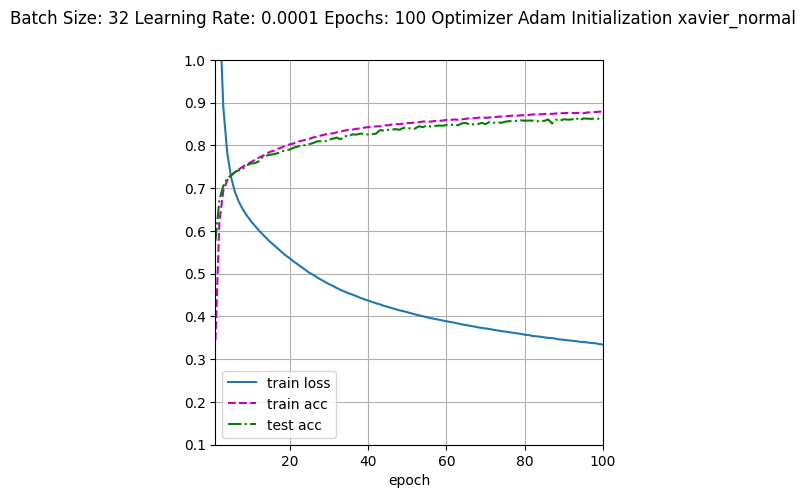

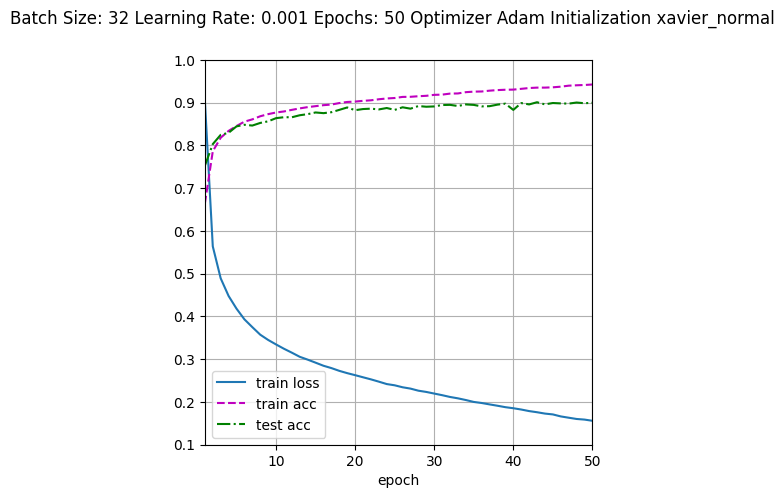

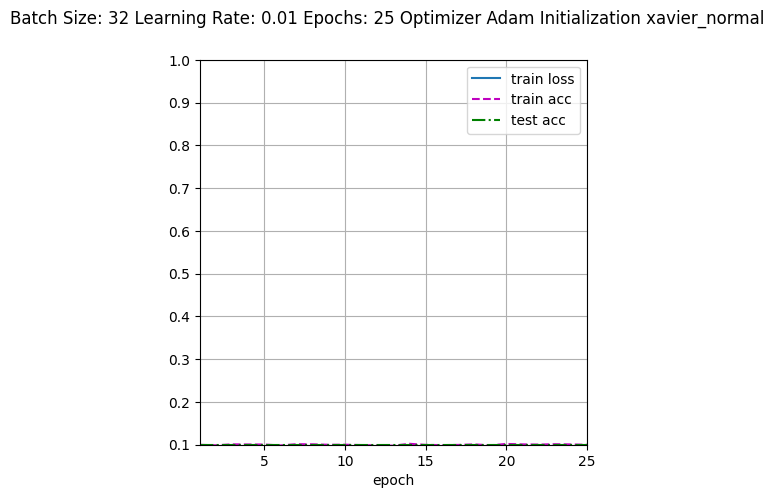

In [ ]:
learningRates = [0.0001, 0.001, 0.01]
numEpochs = [100, 50, 25]
for i in range(3):
    TrainAndEvaluateLeNeModel(learningRate=learningRates[i],
                              numEpochs = numEpochs[i],
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

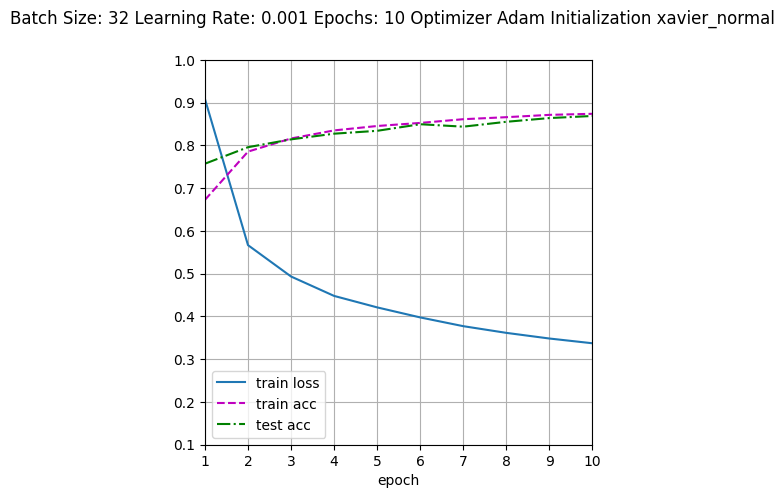

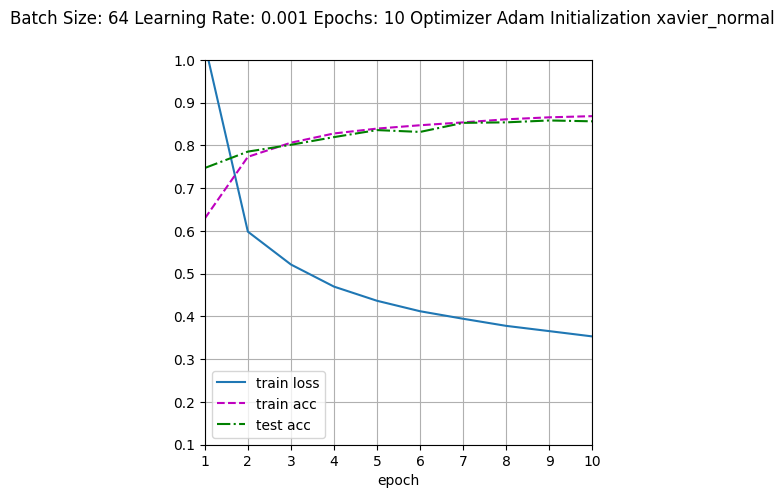

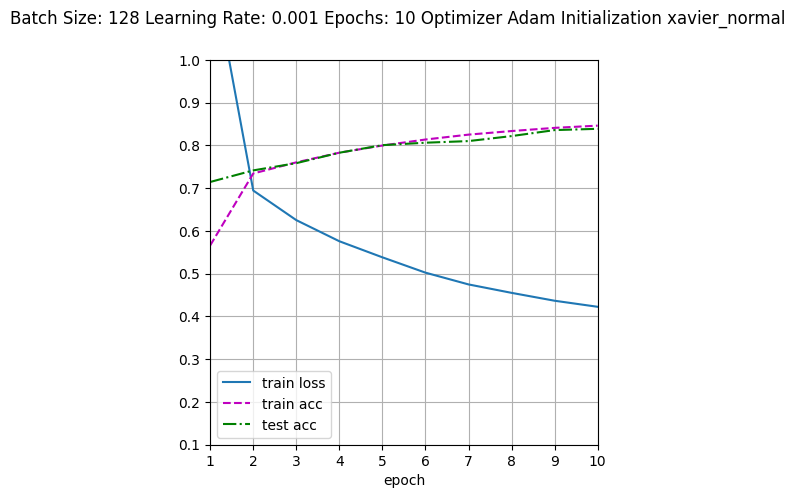

In [ ]:
batchSizes = [32, 64, 128]
for b_size in batchSizes:
    TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = b_size,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

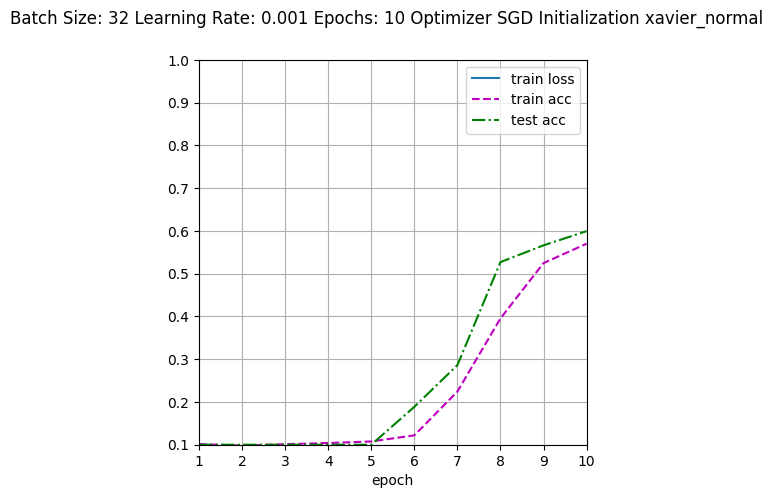

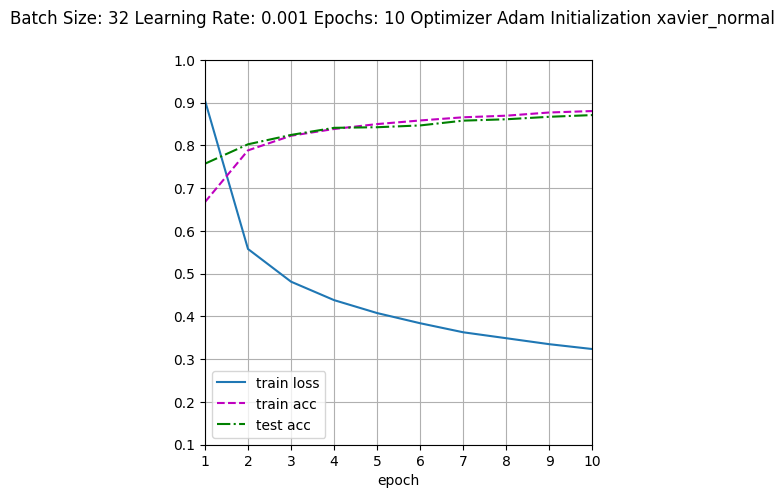

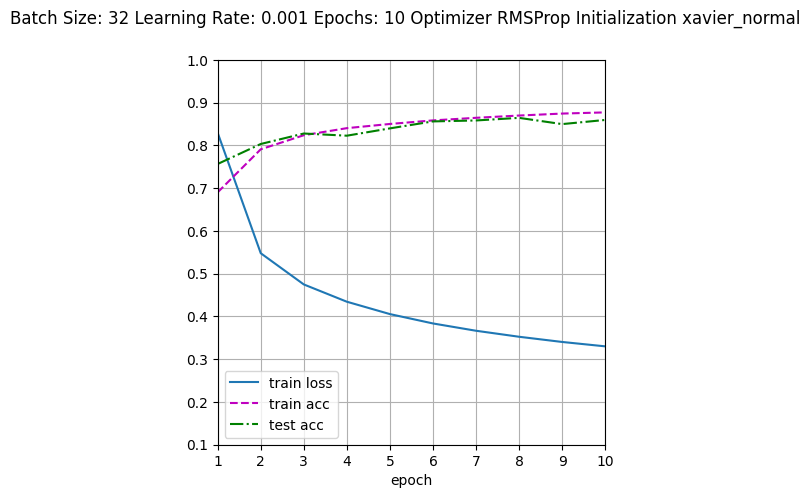

In [ ]:
optimizers = ["SGD","Adam","RMSProp"]
for opt in optimizers:
    TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption=opt,
                              initialization ="xavier_normal")

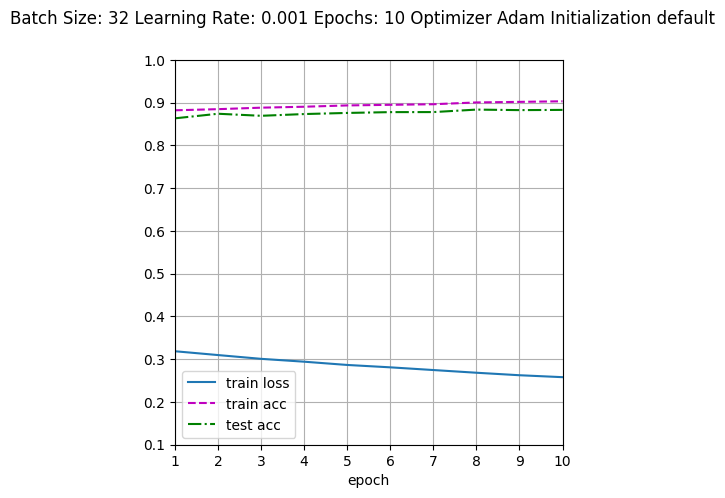

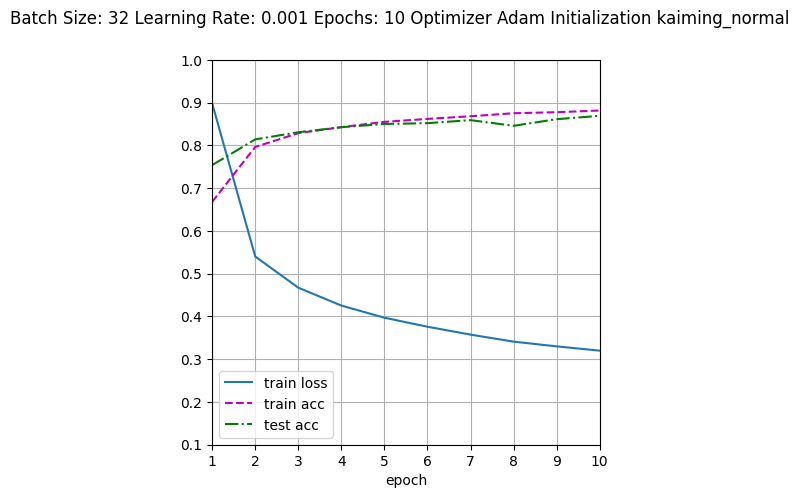

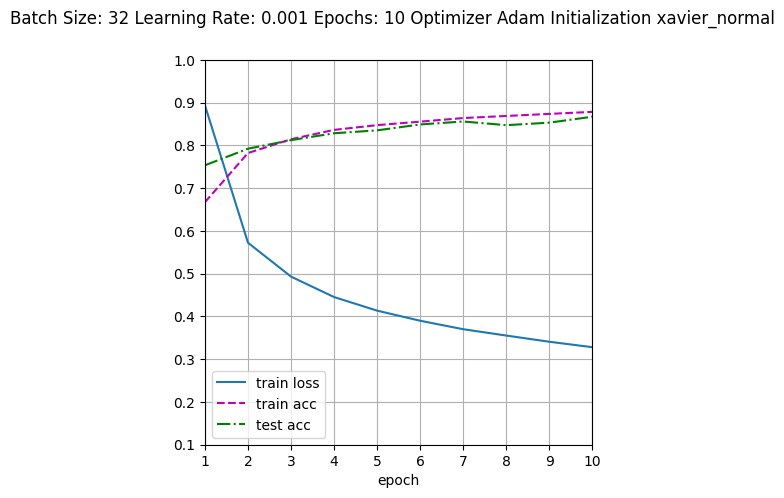

In [ ]:
initializators = ["default","kaiming_normal","xavier_normal"]
for init in initializators:
    TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization =init)

In [ ]:
net = CreateLeNet(Pooling = "maximum pooling", # maximum pooling
                  Activation = "sigmoid"       # softmax, ReLU, LeakyReLU
                  )

Total parameters: 61706
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
Sigmoid output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


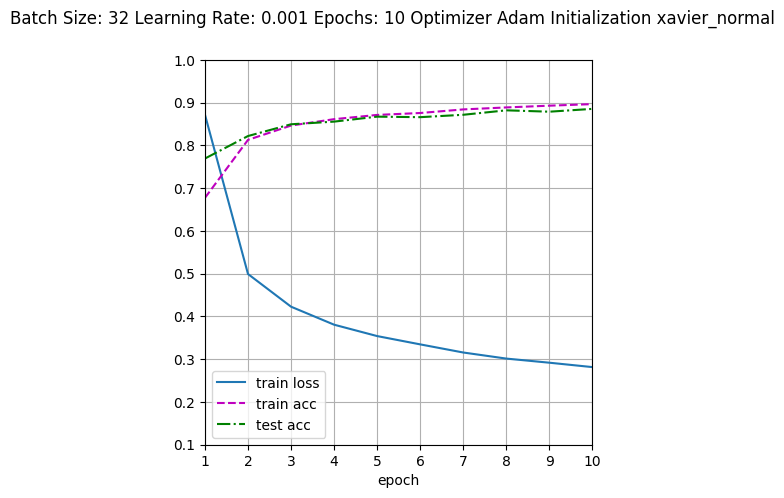

In [ ]:
TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

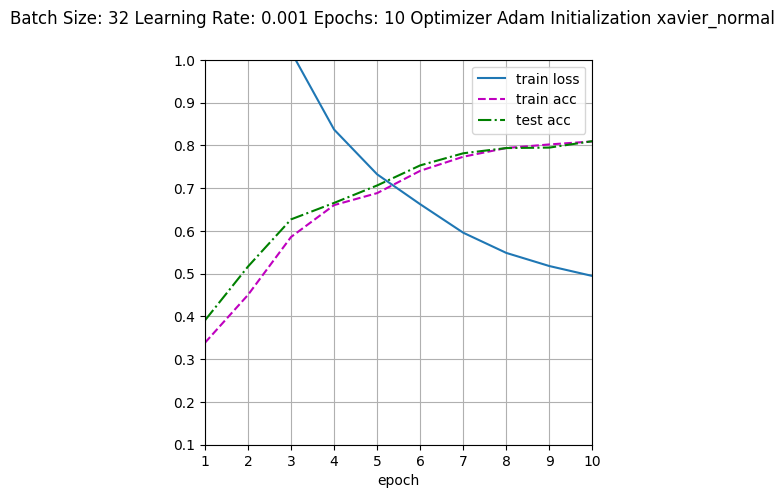

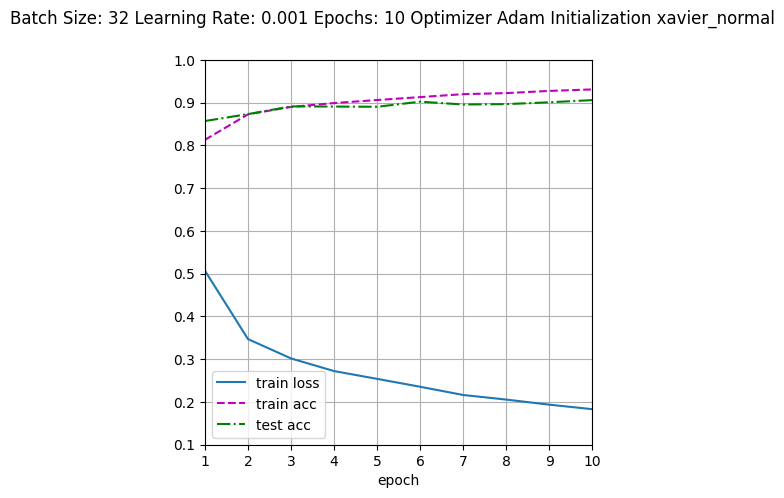

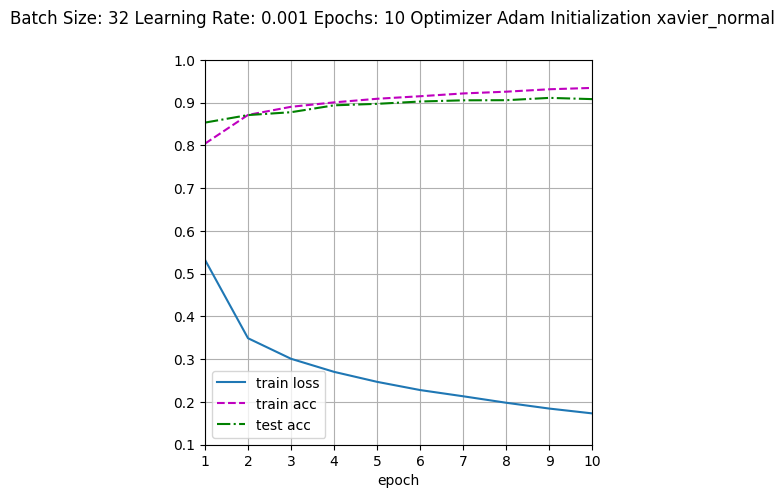

In [ ]:
ActivationFunctions = ["softmax","ReLU","LeakyReLU"]
for activaion in ActivationFunctions:
    net = CreateLeNet(Pooling = "average pooling", # maximum pooling
                      Activation = activaion       # softmax, ReLU, LeakyReLU
                      )
    TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

### Fully Connected layers 1

In [ ]:
net = CreateLeNet(Pooling = "maximum pooling", # maximum pooling
                  Activation = "sigmoid"       # softmax, ReLU, LeakyReLU
                  )

Total parameters: 6582
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 10])


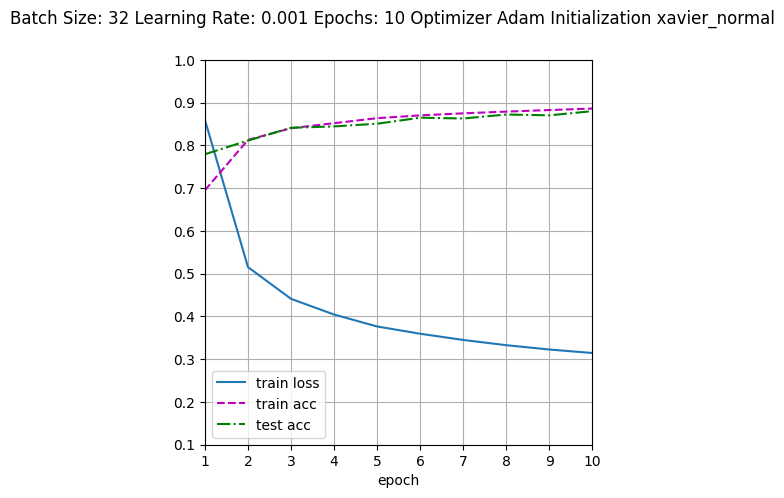

In [ ]:
TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

### Fully Connected layers 2

In [ ]:
net = CreateLeNet(Pooling = "maximum pooling", # maximum pooling
                  Activation = "sigmoid"       # softmax, ReLU, LeakyReLU
                  )

Total parameters: 51902
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
Sigmoid output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
Sigmoid output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
Sigmoid output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 10])


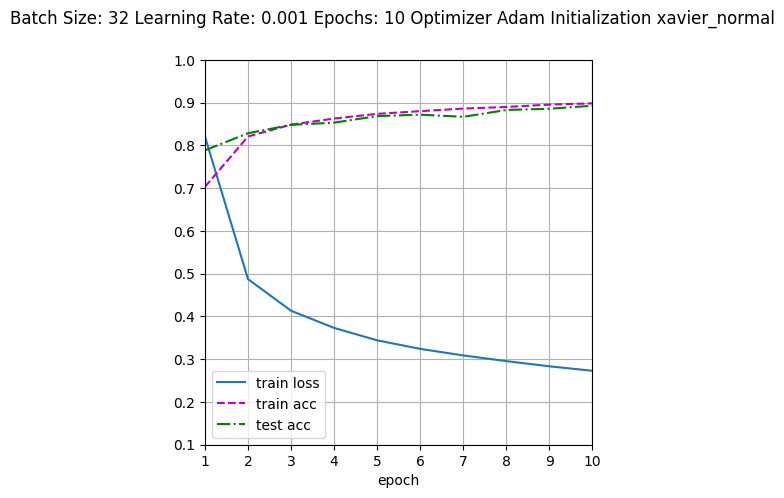

In [ ]:
TrainAndEvaluateLeNeModel(learningRate=0.001,
                              numEpochs = 10,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

# Hyperparameter that results in the best test performance

In [62]:
net = CreateLeNet(Pooling = "maximum pooling", # maximum pooling
                  Activation = "LeakyReLU"       # softmax, ReLU, LeakyReLU
                  )

Total parameters: 61706
Conv2d output shape: 	 torch.Size([1, 6, 28, 28])
LeakyReLU output shape: 	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape: 	 torch.Size([1, 6, 14, 14])
Conv2d output shape: 	 torch.Size([1, 16, 10, 10])
LeakyReLU output shape: 	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape: 	 torch.Size([1, 16, 5, 5])
Flatten output shape: 	 torch.Size([1, 400])
Linear output shape: 	 torch.Size([1, 120])
LeakyReLU output shape: 	 torch.Size([1, 120])
Linear output shape: 	 torch.Size([1, 84])
LeakyReLU output shape: 	 torch.Size([1, 84])
Linear output shape: 	 torch.Size([1, 10])


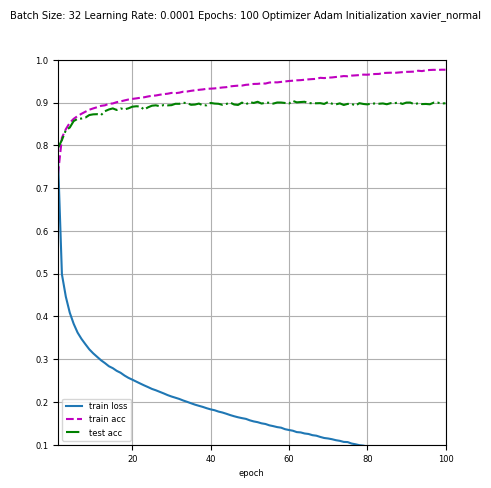

In [63]:

TrainAndEvaluateLeNeModel(learningRate=0.0001,
                              numEpochs = 100,
                              batchSize = 32,
                              optimizerOption="Adam",
                              initialization ="xavier_normal")

In [52]:
import torchvision.models.feature_extraction as fe
fe.get_graph_node_names(net)

model = fe.create_feature_extractor(net, return_nodes=["2"])

output = model(images)['2']
output = output.detach().numpy()

print(output.shape)
print(output[31].shape)

(32, 6, 14, 14)
(6, 14, 14)


In [43]:
images2show = images.detach().numpy()
print(images2show.shape)

(32, 1, 28, 28)


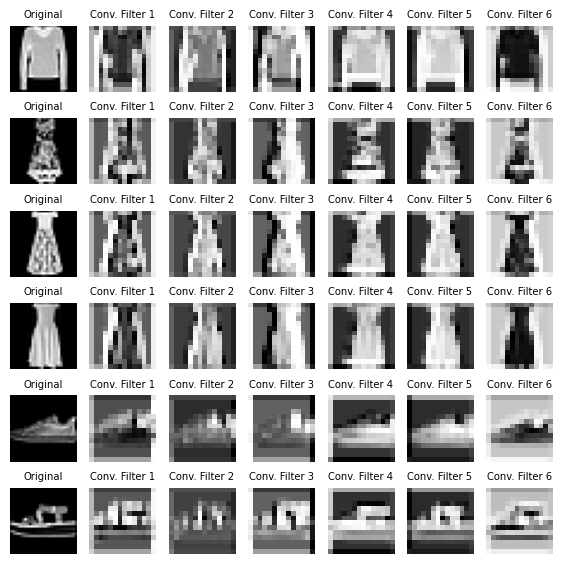

In [57]:
# creating a dictionary
font = {'size':6}
# using rc function
plt.rc('font', **font)

fig = plt.figure(figsize=(1*7, 1*7))  # width, height

for j in range(6):
    #show original
    sub = fig.add_subplot(6, 7, (j*7) + 1)
    sub.axis('off')
    sub.set_title("Original")
    sub.imshow(images2show[j][0], cmap='gray')

    #show convolutional filters 1 to 6
    for i in range(6):
        sub = fig.add_subplot(6, 7, (j*7) + i + 2)
        sub.axis('off')
        sub.set_title("Conv. Filter " + str(i + 1))
        sub.imshow(output[j][i], cmap='gray')


In [59]:
model = fe.create_feature_extractor(net, return_nodes=["5"])

output = model(images)['5']
output = output.detach().numpy()

print(output.shape)
print(output[31].shape)

(32, 16, 5, 5)
(16, 5, 5)


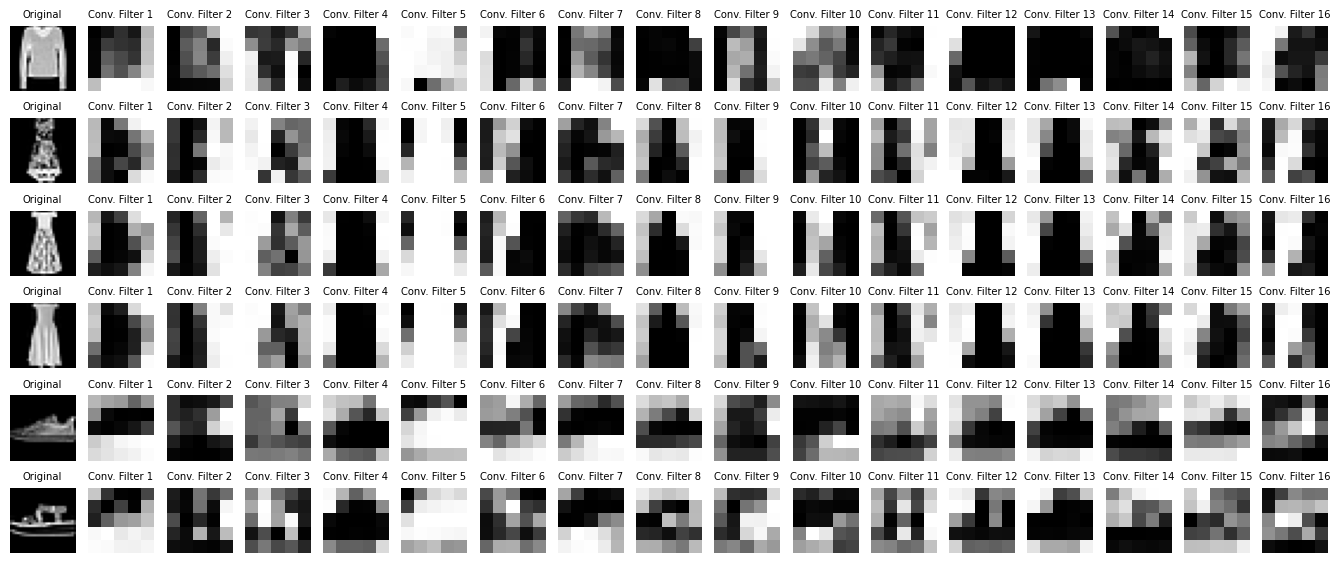

In [61]:
fig = plt.figure(figsize=(17, 1*7))  # width, height

for j in range(6):
    #show original
    sub = fig.add_subplot(6, 17, (j*17) + 1)
    sub.axis('off')
    sub.set_title("Original")
    sub.imshow(images2show[j][0], cmap='gray')

    #show convolutional filters 1 to 6
    for i in range(16):
        sub = fig.add_subplot(6, 17, (j*17) + i + 2)
        sub.axis('off')
        sub.set_title("Conv. Filter " + str(i + 1))
        sub.imshow(output[j][i], cmap='gray')